In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.inspection import permutation_importance
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from math import pi

#I selected the 127 col (violentCrimeRate)
df = pd.read_csv("communities+and+crime/communities.data", header=None, na_values="?")
print(df.head())
print(df.isnull().sum())
print(df.isnull().sum().sum())

   0     1        2                    3    4     5     6     7     8     9    \
0    8   NaN      NaN         Lakewoodcity    1  0.19  0.33  0.02  0.90  0.12   
1   53   NaN      NaN          Tukwilacity    1  0.00  0.16  0.12  0.74  0.45   
2   24   NaN      NaN         Aberdeentown    1  0.00  0.42  0.49  0.56  0.17   
3   34   5.0  81440.0  Willingborotownship    1  0.04  0.77  1.00  0.08  0.12   
4   42  95.0   6096.0    Bethlehemtownship    1  0.01  0.55  0.02  0.95  0.09   

   ...   118   119   120   121   122  123  124   125   126   127  
0  ...  0.12  0.26  0.20  0.06  0.04  0.9  0.5  0.32  0.14  0.20  
1  ...  0.02  0.12  0.45   NaN   NaN  NaN  NaN  0.00   NaN  0.67  
2  ...  0.01  0.21  0.02   NaN   NaN  NaN  NaN  0.00   NaN  0.43  
3  ...  0.02  0.39  0.28   NaN   NaN  NaN  NaN  0.00   NaN  0.12  
4  ...  0.04  0.09  0.02   NaN   NaN  NaN  NaN  0.00   NaN  0.03  

[5 rows x 128 columns]
0         0
1      1174
2      1177
3         0
4         0
       ... 
123    1675
124

In [19]:
df_clean = df.iloc[:, 5:]
df_clean.columns = range(df_clean.shape[1])
df_filled = df_clean.fillna(df.median(numeric_only=True))
print(df_filled.head())
print(df_filled.iloc[:, 0])

df_num = df_filled.select_dtypes(include=[np.number])

X = df_num.iloc[:, :-1]
y = df_num.iloc[:, -1] #violentCrimeRate

    0     1     2     3     4     5     6     7     8     9    ...   113  \
0  0.19  0.33  0.02  0.90  0.12  0.17  0.34  0.47  0.29  0.32  ...  0.12   
1  0.00  0.16  0.12  0.74  0.45  0.07  0.26  0.59  0.35  0.27  ...  0.02   
2  0.00  0.42  0.49  0.56  0.17  0.04  0.39  0.47  0.28  0.32  ...  0.01   
3  0.04  0.77  1.00  0.08  0.12  0.10  0.51  0.50  0.34  0.21  ...  0.02   
4  0.01  0.55  0.02  0.95  0.09  0.05  0.38  0.38  0.23  0.36  ...  0.04   

    114   115   116   117   118   119   120   121   122  
0  0.26  0.20  0.06  0.04  0.90  0.50  0.32  0.14  0.20  
1  0.12  0.45  0.57  0.26  0.04  0.17  0.00  0.08  0.67  
2  0.21  0.02  0.57  0.26  0.04  0.17  0.00  0.08  0.43  
3  0.39  0.28  0.57  0.26  0.04  0.17  0.00  0.08  0.12  
4  0.09  0.02  0.57  0.26  0.04  0.17  0.00  0.08  0.03  

[5 rows x 123 columns]
0       0.19
1       0.00
2       0.00
3       0.04
4       0.01
        ... 
1989    0.01
1990    0.05
1991    0.16
1992    0.08
1993    0.20
Name: 0, Length: 1994, dtype

MSE: 0.026251458673551723
R^2 Score: 0.4519041798005978


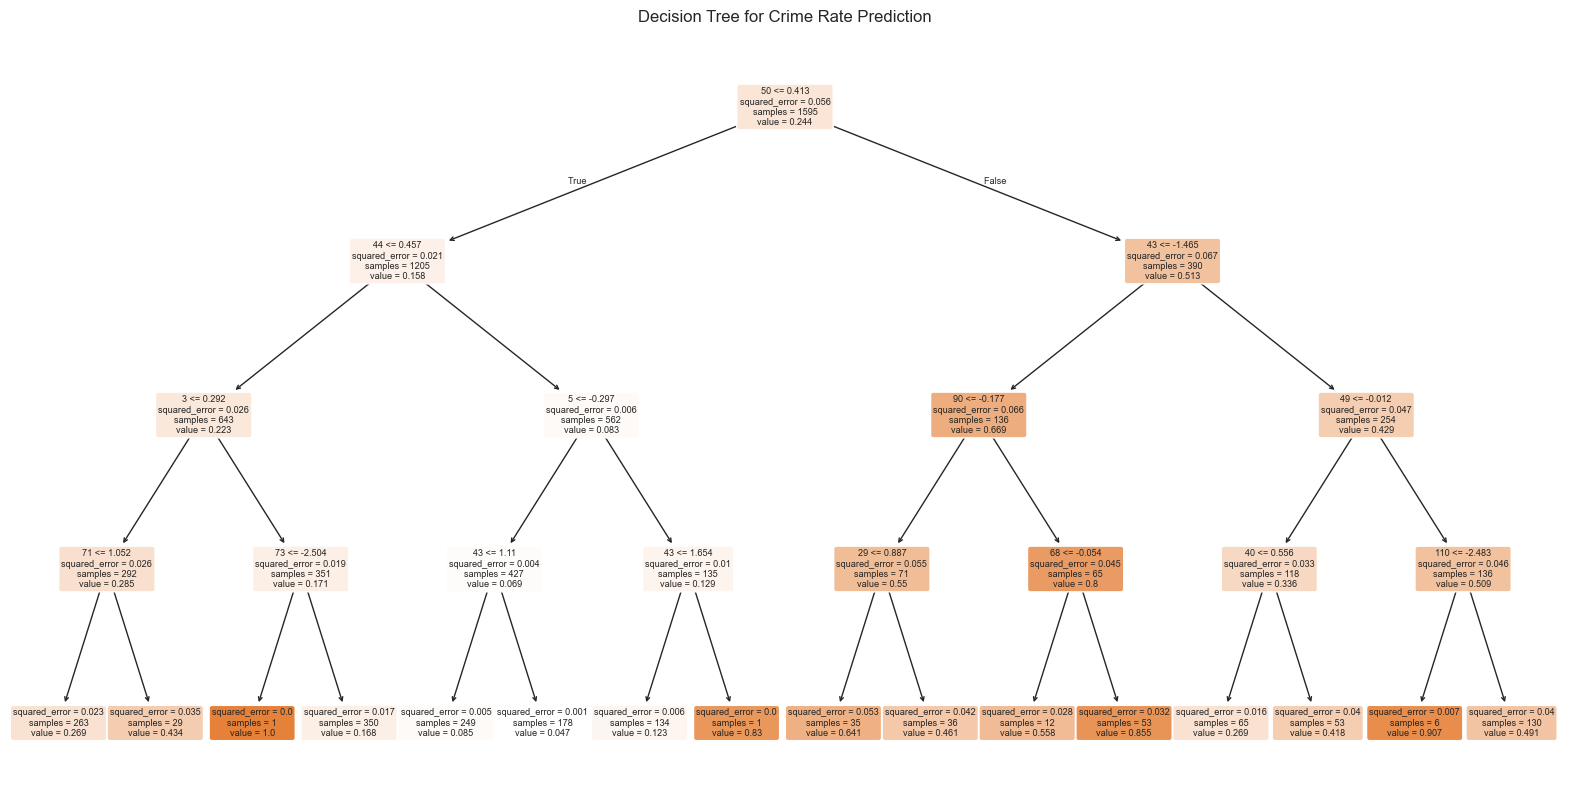

In [20]:
#Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Train/test splits
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# --- Decision Tree ---
tree_model = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)
tree_mse = mean_squared_error(y_test, tree_pred)
tree_r2 = r2_score(y_test, tree_pred)

print(f"MSE: {tree_mse}")
print(f"R^2 Score: {tree_r2}")

plt.figure(figsize=(20, 10))
plot_tree(tree_model, filled=True, feature_names=X.columns, rounded=True)
plt.title("Decision Tree for Crime Rate Prediction")
plt.show()

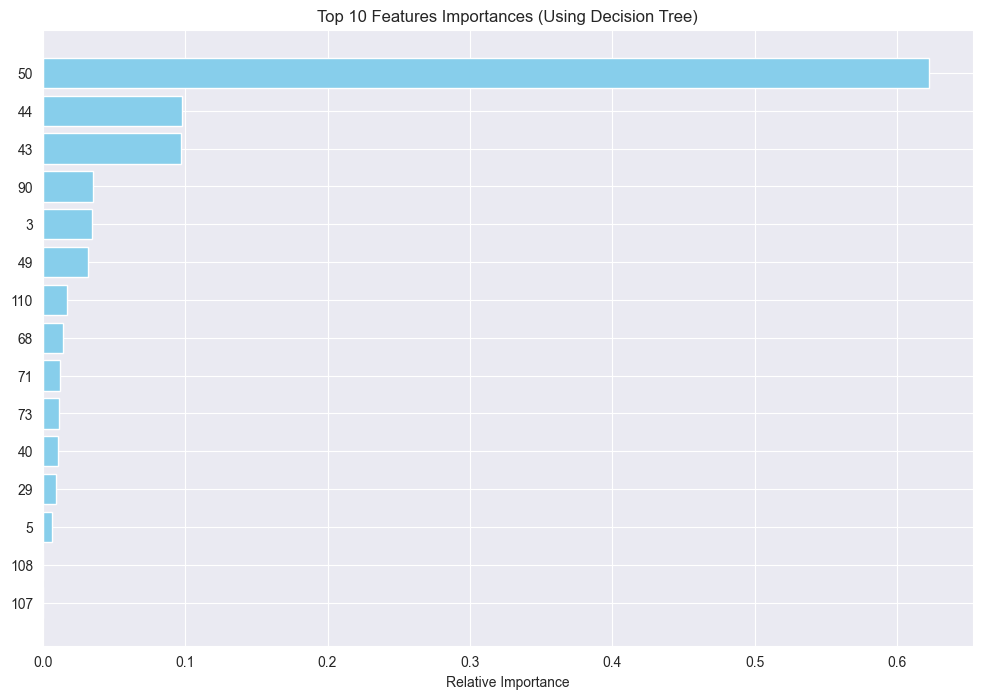

In [23]:
# --- Get the top 10 important features with Decision Tree ---
importances = tree_model.feature_importances_

index = np.argsort(importances)[-15:]
features = np.array(df_num.columns[:-1])[index]

plt.figure(figsize=(12, 8))
plt.barh(range(len(index)), importances[index], color='skyblue')
plt.yticks(range(len(index)), features)
plt.xlabel('Relative Importance')
plt.title('Top 10 Features Importances (Using Decision Tree)')
plt.grid(True)
plt.show()

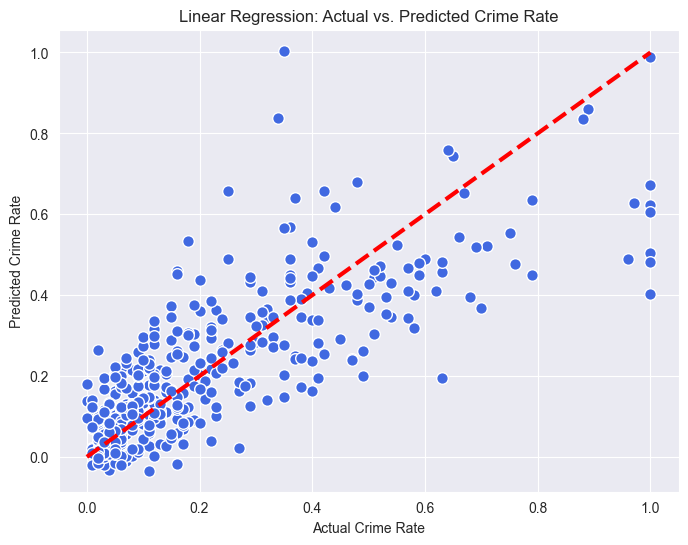

In [29]:
# --- Linear Regression ---
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
lin_pred = lin_model.predict(X_test)
lin_mse = mean_squared_error(y_test, lin_pred)
lin_r2 = r2_score(y_test, lin_pred)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, lin_pred, color="royalblue", edgecolor="white", s=70)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)

plt.xlabel('Actual Crime Rate')
plt.ylabel('Predicted Crime Rate')
plt.title('Linear Regression: Actual vs. Predicted Crime Rate')
plt.grid(True)
plt.show()

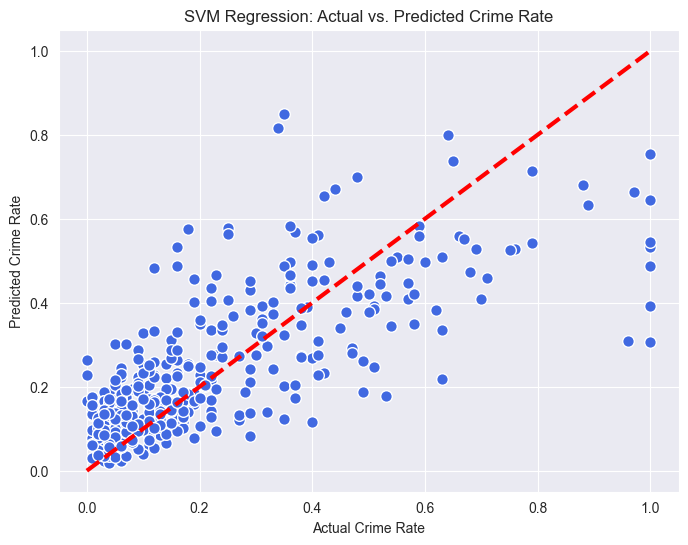

In [30]:
# --- SVM Regressor ---
svm_model = SVR()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_mse = mean_squared_error(y_test, svm_pred)
svm_r2 = r2_score(y_test, svm_pred)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, svm_pred, color="royalblue", edgecolor="white", s=70)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)

plt.xlabel('Actual Crime Rate')
plt.ylabel('Predicted Crime Rate')
plt.title('SVM Regression: Actual vs. Predicted Crime Rate')
plt.grid(True)
plt.show()

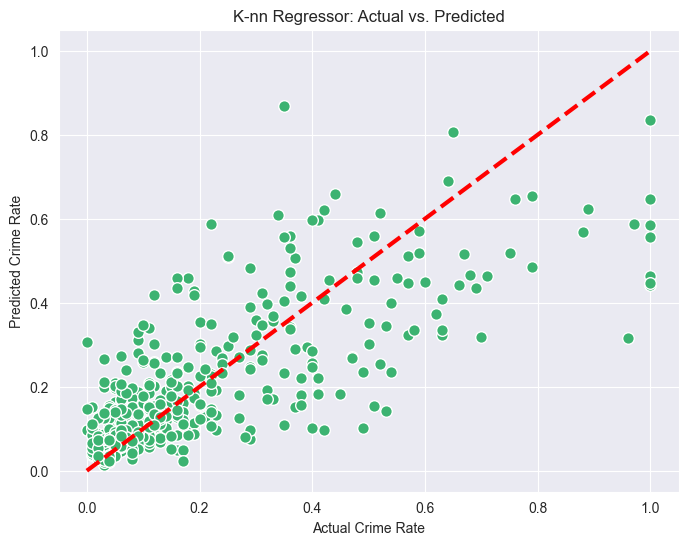

In [31]:
# --- KNN Regressor ---
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_mse = mean_squared_error(y_test, knn_pred)
knn_r2 = r2_score(y_test, knn_pred)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, knn_pred, color='mediumseagreen', edgecolor='white', s=70)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
plt.xlabel('Actual Crime Rate')
plt.ylabel('Predicted Crime Rate')
plt.title('K-nn Regressor: Actual vs. Predicted')
plt.grid(True)
plt.show()

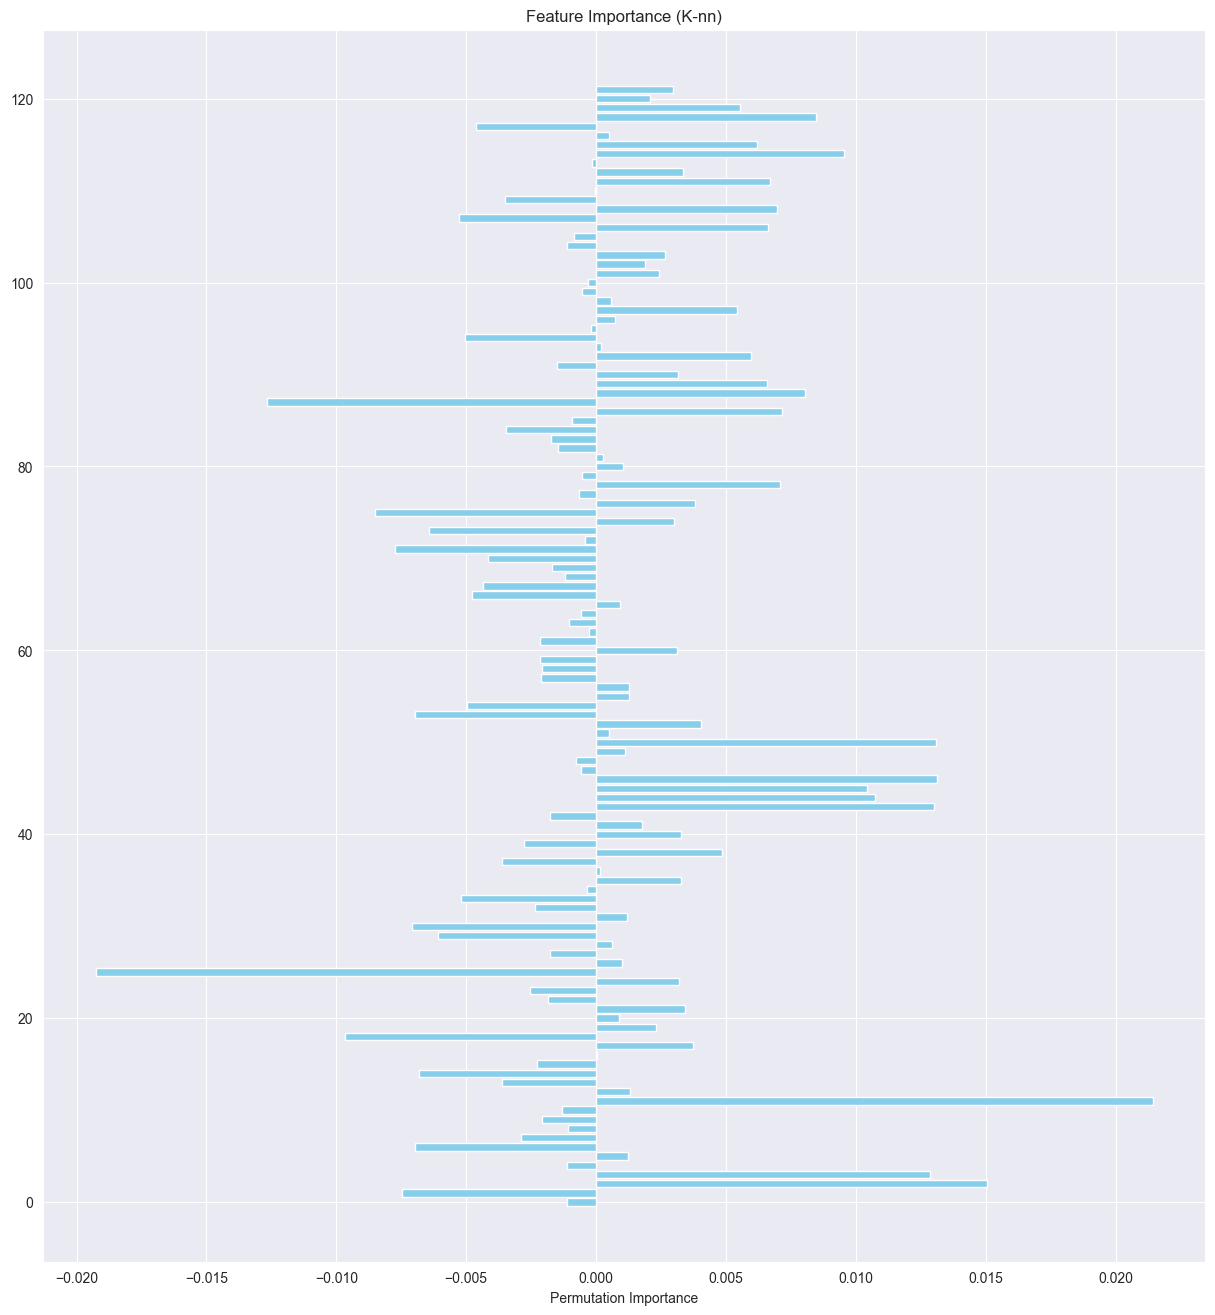

In [32]:
# --- Taking the Permutation Feature Importance to assess feature importance with KNN ---

perm_importance = permutation_importance(knn_model, X_test, y_test, n_repeats=10, random_state=42)
importance_scores = perm_importance.importances_mean

plt.figure(figsize=(15, 16))
plt.barh(X.columns, importance_scores, color='skyblue')
plt.xlabel('Permutation Importance')
plt.title('Feature Importance (K-nn)')
plt.show()

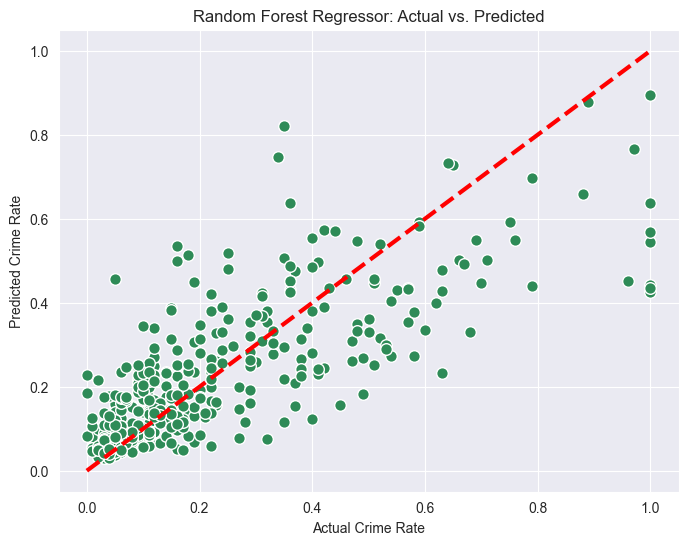

In [33]:
# --- Random Forest Regressor ---
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_pred, color='seagreen', edgecolor='white', s=70)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
plt.xlabel('Actual Crime Rate')
plt.ylabel('Predicted Crime Rate')
plt.title('Random Forest Regressor: Actual vs. Predicted')
plt.grid(True)
plt.show()

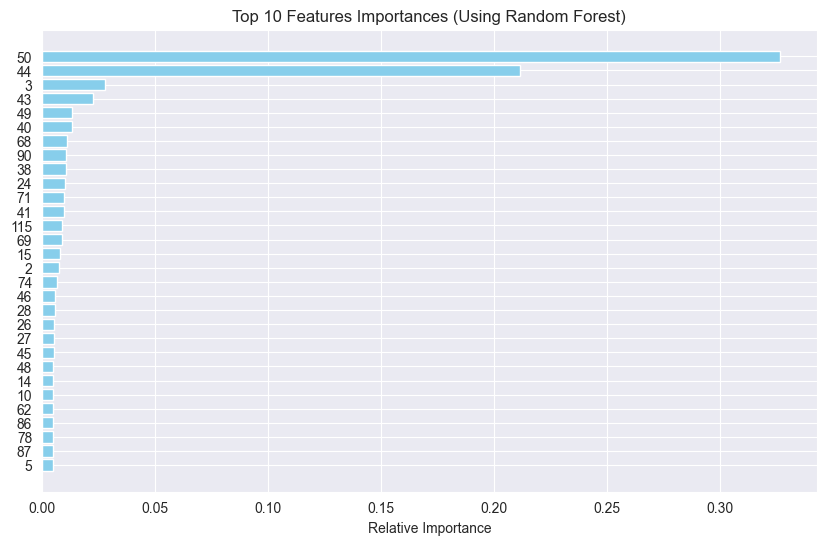

In [34]:
# --- Get the top 10 important features with Random Forest ---
importances = rf_model.feature_importances_

index = np.argsort(importances)[-30:]
features = np.array(df_num.columns[:-1])[index]

plt.figure(figsize=(10, 6))
plt.barh(range(len(index)), importances[index], color='skyblue')
plt.yticks(range(len(index)), features)
plt.xlabel('Relative Importance')
plt.title('Top 10 Features Importances (Using Random Forest)')
plt.grid(True)
plt.show()

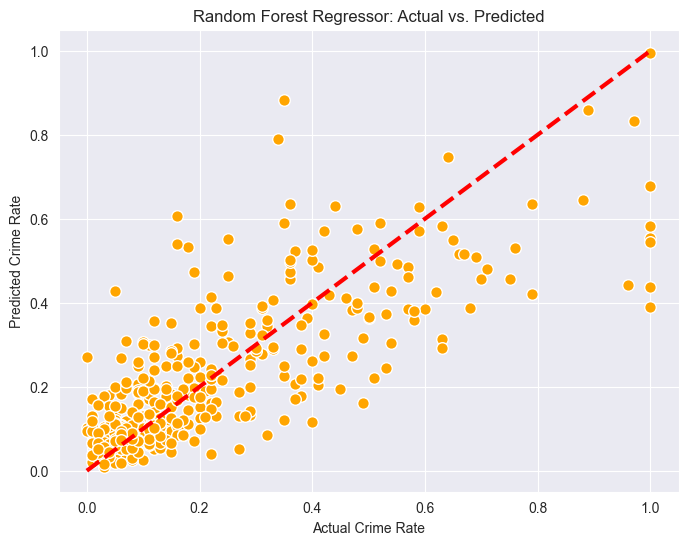

In [35]:
# --- CatBoost Regressor ---
cat_model = CatBoostRegressor(verbose=0, random_state=42)
cat_model.fit(X_train, y_train)
cat_pred = cat_model.predict(X_test)
cat_mse = mean_squared_error(y_test, cat_pred)
cat_r2 = r2_score(y_test, cat_pred)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, cat_pred, color='orange', edgecolor='white', s=70)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
plt.xlabel('Actual Crime Rate')
plt.ylabel('Predicted Crime Rate')
plt.title('Random Forest Regressor: Actual vs. Predicted')
plt.grid(True)
plt.show()

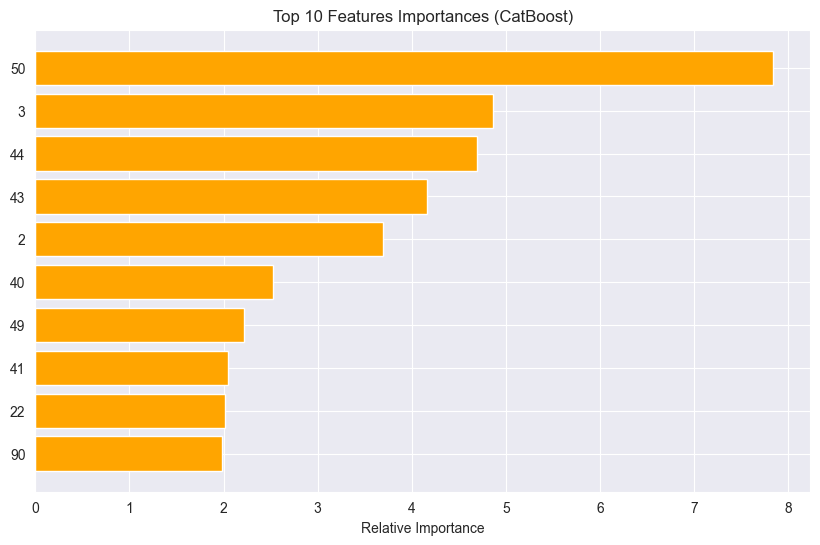

In [40]:
# --- Plot Feature Importances with CatBoost ---
importances = cat_model.get_feature_importance()

index = np.argsort(importances)[-10:]
features = np.array(df_num.columns[:-1])[index]

plt.figure(figsize=(10, 6))
plt.barh(range(len(index)), importances[index], color='orange')
plt.yticks(range(len(index)), features)
plt.xlabel('Relative Importance')
plt.title('Top 10 Features Importances (CatBoost)')
plt.grid(True)
plt.show()

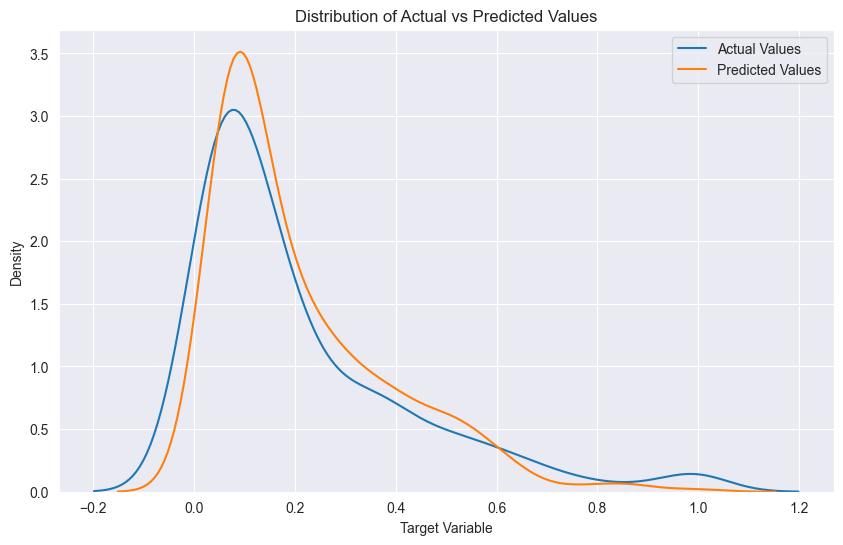

In [41]:
# --- Distribution plot with CatBoost ---
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, label='Actual Values')
sns.kdeplot(cat_pred, label='Predicted Values')
plt.xlabel('Target Variable')
plt.title('Distribution of Actual vs Predicted Values')
plt.legend()
plt.show()

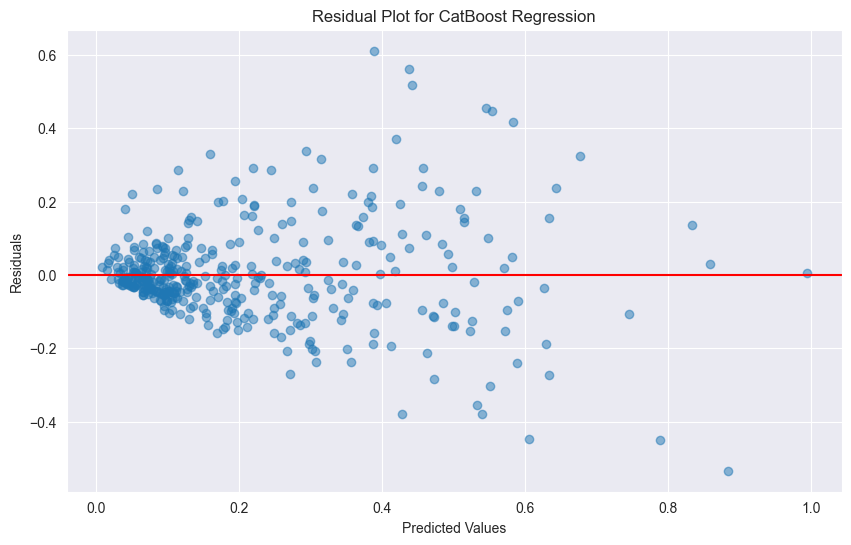

In [42]:
# --- Residual Plot for CatBoost ---
residuals = y_test - cat_pred
plt.figure(figsize=(10, 6))
plt.scatter(cat_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for CatBoost Regression')
plt.show()

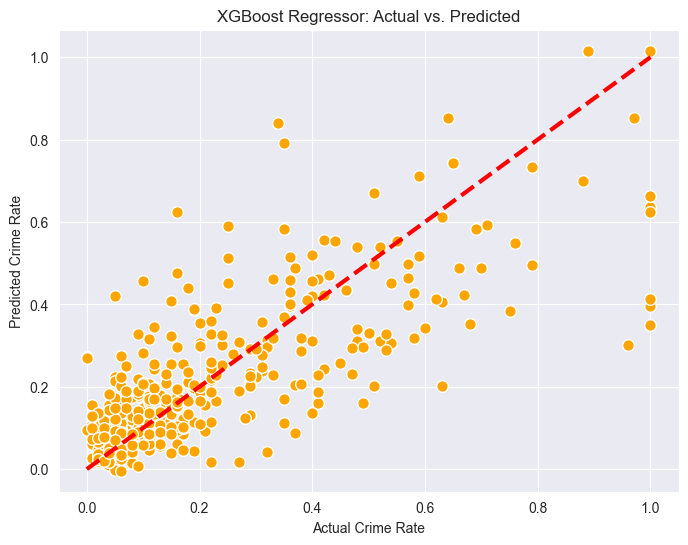

In [44]:
# --- XGBoost Regressor ---
xgb_model = XGBRegressor(random_state=42, verbosity=0)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, xgb_pred, color='orange', edgecolor='white', s=70)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
plt.xlabel('Actual Crime Rate')
plt.ylabel('Predicted Crime Rate')
plt.title('XGBoost Regressor: Actual vs. Predicted')
plt.grid(True)
plt.show()

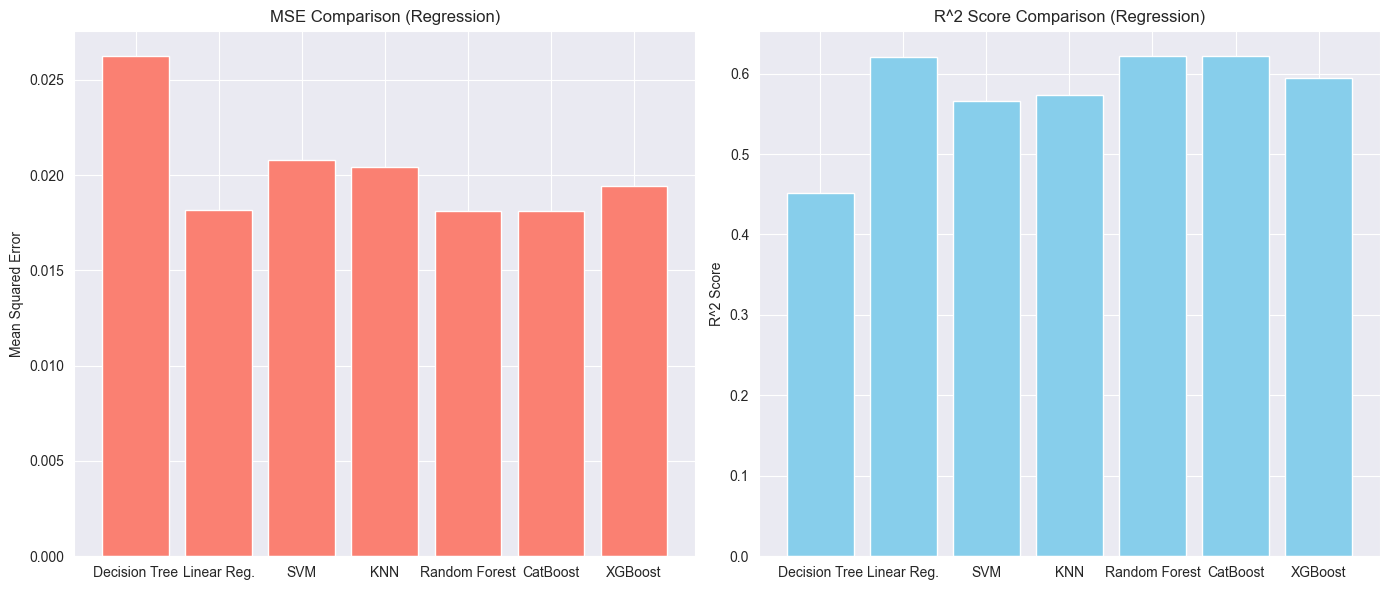

In [51]:
# --- Plot MSE and R^2 Comparison
models = ['Decision Tree', 'Linear Reg.', 'SVM', 'KNN', 'Random Forest', 'CatBoost', 'XGBoost']
mses = [tree_mse, lin_mse, svm_mse, knn_mse, rf_mse, cat_mse, xgb_mse]
r2s = [tree_r2, lin_r2, svm_r2, knn_r2, rf_r2, cat_r2, xgb_r2]

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

#MSE bar chart
ax[0].bar(models, mses, color="salmon")
ax[0].set_title('MSE Comparison (Regression)')
ax[0].set_ylabel('Mean Squared Error')

#R^2 bar chart
ax[1].bar(models, r2s, color='skyblue')
ax[1].set_title('R^2 Score Comparison (Regression)')
ax[1].set_ylabel('R^2 Score')

plt.tight_layout()
plt.show()

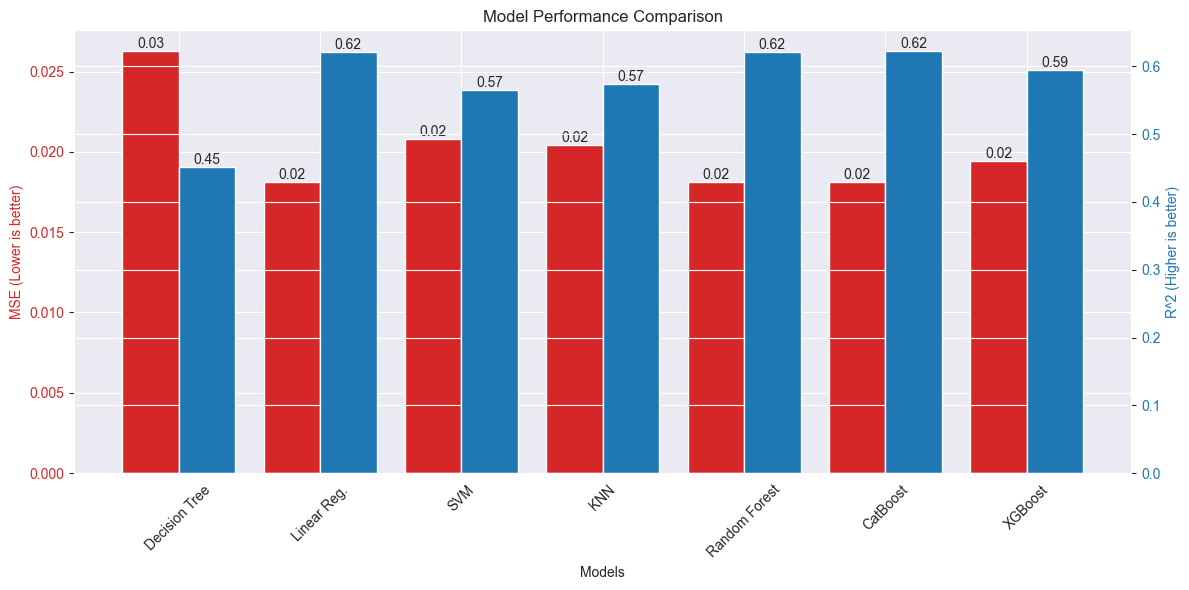

In [55]:
# --- Combined Metric Plot Comparison
fig, ax1 = plt.subplots(figsize=(12, 6))
color = 'tab:red'
ax1.set_xlabel('Models')
ax1.set_ylabel('MSE (Lower is better)', color=color)
bars1 = ax1.bar(np.arange(len(models)) - 0.2, mses, 0.4, color=color, label='MSE')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(range(len(models)))
ax1.set_xticklabels(models, rotation=45)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('R^2 (Higher is better)', color=color)
bars2 = ax2.bar(np.arange(len(models)) + 0.2, r2s, 0.4, color=color, label="R^2")
ax2.tick_params(axis="y", labelcolor=color)

for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height, f'{height:.2f}', ha='center', va='bottom')
    
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height, f'{height:.2f}', ha='center', va='bottom')

plt.title('Model Performance Comparison')
fig.tight_layout()
plt.show()

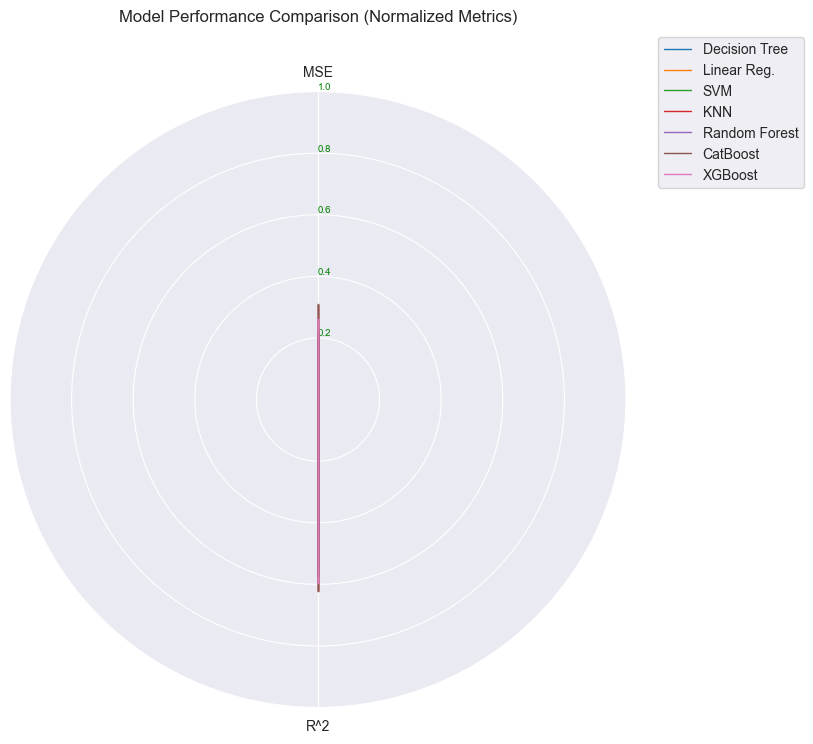

In [65]:
# --- Radar Chart for Multi-Metric Comparison
norm_mses = 1 - (np.array(mses) / max(mses))
norm_r2s = np.array(r2s)

categories = ['MSE', 'R^2']
N = len(categories)

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], categories)
ax.set_rlabel_position(0)
plt.yticks([0.2, 0.4, 0.6, 0.8, 1], ["0.2", "0.4", "0.6", "0.8", "1.0"], color="green", size=7)
plt.ylim(0, 1)

for i, model in enumerate(models):
    values = [norm_mses[i], norm_r2s[i]]
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=model)
    ax.fill(angles, values, alpha=0.1)
    
plt.title('Model Performance Comparison (Normalized Metrics)', y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()

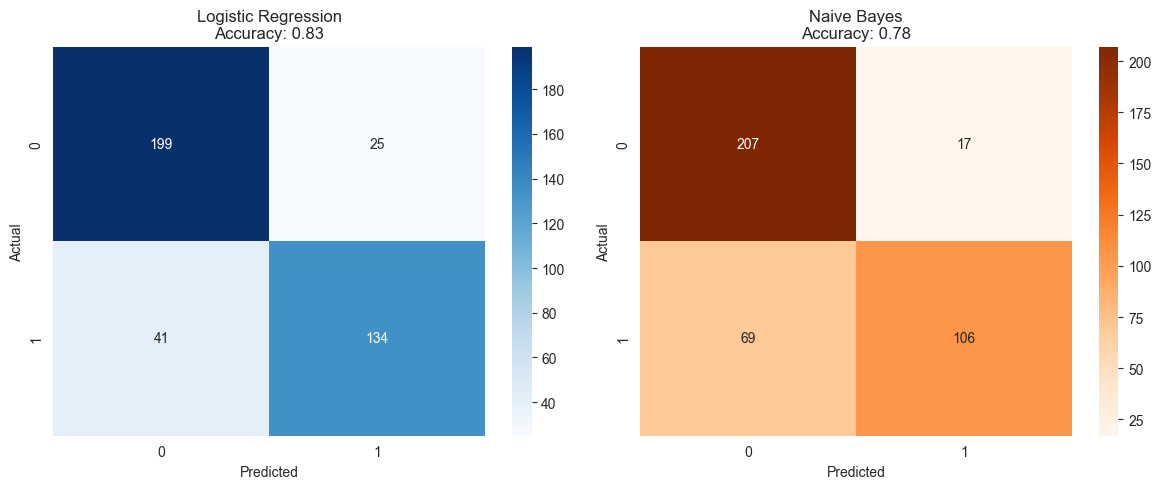

In [46]:
# --- Classi,, a, n Models ---
# First -> convert y to binary -> 1 = high crime, 0 = low crime
median_crime = y.median()
y_binary = (y > median_crime).astype(int)
y_train_bin, y_test_bin = train_test_split(y_binary, test_size=0.2, random_state=42)

# --- Logistic Regression ---
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train_bin)
log_pred = log_model.predict(X_test)
log_acc = accuracy_score(y_test_bin, log_pred)
log_cm = confusion_matrix(y_test_bin, log_pred)

# --- Naive Bayes ---
nb_model = GaussianNB()
nb_model.fit(X_train, y_train_bin)
nb_pred = nb_model.predict(X_test)
nb_acc = accuracy_score(y_test_bin, nb_pred)
nb_cm = confusion_matrix(y_test_bin, nb_pred)

# --- Plot Confusion Matrices ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(log_cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title(f'Logistic Regression\nAccuracy: {log_acc:.2f}')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Oranges', ax=axes[1])
axes[1].set_title(f'Naive Bayes\nAccuracy: {nb_acc:.2f}')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()